<b>Razones para Investigar el Rendimiento de los Fondos de Inversión Colombianos</b> 

1. Importancia del Mercado Colombiano:

El mercado de fondos de inversión en Colombia ha experimentado un crecimiento significativo en los últimos años.
A diciembre de 2023, el patrimonio administrado por los fondos de inversión colombianos superaba los $200 billones de pesos colombianos.
Este crecimiento refleja el interés de los colombianos por invertir en instrumentos que les permitan diversificar sus portafolios y obtener mejores retornos.

2. Rentabilidad:

Los fondos de inversión colombianos han ofrecido históricamente retornos atractivos, superando en algunos casos la rentabilidad del mercado bursátil.
El análisis del rendimiento de los fondos de inversión puede ayudar a los inversionistas a identificar aquellos que han logrado consistentemente buenos resultados.

3. Diversificación:

Los fondos de inversión ofrecen una amplia variedad de opciones para diversificar el portafolio de un inversionista.
Existen fondos que invierten en diferentes tipos de activos, como acciones, renta fija, commodities, etc.
El análisis del rendimiento de los fondos de inversión puede ayudar a los inversionistas a seleccionar aquellos que mejor se adapten a sus objetivos de inversión y perfil de riesgo.

4. Información para la Toma de Decisiones:

El análisis del rendimiento de los fondos de inversión puede proporcionar información valiosa para la toma de decisiones de inversión.
Esta información puede ayudar a los inversionistas a:
Seleccionar los fondos con mejor potencial de rentabilidad.
Evaluar el desempeño de los gestores de fondos.
Comparar diferentes tipos de fondos de inversión.
Tomar decisiones informadas sobre cómo invertir su dinero.

5. Transparencia:

La industria de fondos de inversión en Colombia está regulada por la Superintendencia Financiera de Colombia.
Esta regulación exige a las entidades que administran fondos de inversión divulgar información relevante sobre sus productos, incluyendo el rendimiento histórico.
La disponibilidad de esta información facilita el análisis del rendimiento de los fondos de inversión.

6. Oportunidades de Inversión:

El análisis del rendimiento de los fondos de inversión puede ayudar a los inversionistas a identificar oportunidades de inversión atractivas.
Este análisis puede ayudar a los inversionistas a encontrar fondos que estén infravalorados o que tengan un potencial de crecimiento significativo.
En resumen, investigar el rendimiento de los fondos de inversión colombianos puede ser una actividad muy valiosa para los inversionistas.

Esta investigación puede proporcionar información importante para la toma de decisiones de inversión y ayudar a los inversionistas a encontrar oportunidades de inversión atractivas.

<b>Contribución del Análisis de Datos al Problema Definido:</b>

El análisis de datos puede contribuir a comprender o resolver el problema definido de varias maneras:

1. Identificar patrones y tendencias:

El análisis de datos puede ayudar a identificar patrones y tendencias en los datos que no son evidentes a simple vista.
Esta información puede ser utilizada para comprender mejor el problema y sus causas.

2. Evaluar la eficacia de las soluciones:

El análisis de datos puede ser utilizado para evaluar la eficacia de las soluciones propuestas para el problema.
Esta información puede ser utilizada para determinar si las soluciones están funcionando como se esperaba y si es necesario realizar ajustes.

3. Predecir el comportamiento futuro:

El análisis de datos puede ser utilizado para predecir el comportamiento futuro del problema.
Esta información puede ser utilizada para tomar decisiones informadas sobre cómo prevenir o mitigar el problema.

4. Optimizar recursos:

El análisis de datos puede ser utilizado para optimizar la asignación de recursos para la solución del problema.
Esta información puede ser utilizada para asegurar que los recursos se están utilizando de la manera más eficiente posible.
Ideas que se pueden obtener del análisis de datos:

- Perfiles de los inversores: El análisis de datos puede ayudar a identificar los diferentes tipos de inversores que participan en el mercado de fondos de inversión colombianos.
- Factores de rentabilidad: El análisis de datos puede ayudar a identificar los factores que determinan la rentabilidad de los fondos de inversión colombianos.
- Estrategias de inversión: El análisis de datos puede ayudar a identificar estrategias de inversión exitosas en el mercado colombiano.
- Riesgos de inversión: El análisis de datos puede ayudar a identificar los riesgos asociados con la inversión en fondos de inversión colombianos.
- Tendencias del mercado: El análisis de datos puede ayudar a identificar las tendencias del mercado de fondos de inversión colombianos.

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [4]:
def query_data_paginated(url, params={}, headers={}, page_size=10000):
    """
    Queries data from the specified URL using paginated requests with offset and limit parameters.

    Args:
        url (str): The URL of the API endpoint.
        params (dict, optional): Additional query parameters to include. Defaults to {}.
        headers (dict, optional): HTTP headers to include in the request. Defaults to {}.
        page_size (int, optional): The number of records to retrieve per page. Defaults to 1000.

    Returns:
        list: A list of all retrieved data records.
    """

    all_data = []
    offset = 0

    while True:
        limit = page_size
        params["$offset"] = offset
        params["$limit"] = limit

        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()  # Raise an exception if request fails
        except requests.exceptions.RequestException as e:
            print(f"Error making request: {e}")
            break

        data = response.json() 

        if not data:  
            break

        all_data.extend(data)
        offset += limit

    return all_data

url = "https://www.datos.gov.co/resource/qhpu-8ixx.json"
headers = {"Accept": "application/json"} 

data = query_data_paginated(url, headers=headers)
df = pd.DataFrame(data)

print(df)

Error making request: 503 Server Error: Service Temporarily Unavailable for url: https://www.datos.gov.co/resource/qhpu-8ixx.json?%24offset=0&%24limit=10000
Empty DataFrame
Columns: []
Index: []


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


## Corrección de campos

In [5]:
# Diccionario con los tipos de datos
tipos_datos = {
"fecha_corte":"datetime64[ns]",
"tipo_entidad":"int64",         
"nombre_tipo_entidad":"str",
"codigo_entidad":"int64",	   
"nombre_entidad":"str",       
"tipo_negocio":"int64",         
"nombre_tipo_patrimonio":"str",
"subtipo_negocio":"int64",      
"nombre_subtipo_patrimonio":"str",
"codigo_negocio":"int64",      
"nombre_patrimonio":"str",  
"principal_compartimento":"float",
"tipo_participacion":"float",   
"rendimientos_abonados":"float",
"precierre_fondo_dia_t":"float",
"numero_unidades_fondo_cierre":"float", 
"valor_unidad_operaciones":"float",
"aportes_recibidos":"float",
"retiros_redenciones":"float",  
"anulaciones":"float",      
"valor_fondo_cierre_dia_t":"float",
"numero_inversionistas":"float", 
"rentabilidad_diaria":"float", 
"rentabilidad_mensual":"float", 
"rentabilidad_semestral":"float",
"rentabilidad_anual":"float"
}

# Cambia el tipo de dato de las columnas
for campo, tipo in tipos_datos.items():
    df[campo] = df[campo].astype(tipo)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979657 entries, 0 to 1979656
Data columns (total 26 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha_corte                   datetime64[ns]
 1   tipo_entidad                  int64         
 2   nombre_tipo_entidad           object        
 3   codigo_entidad                int64         
 4   nombre_entidad                object        
 5   tipo_negocio                  int64         
 6   nombre_tipo_patrimonio        object        
 7   subtipo_negocio               int64         
 8   nombre_subtipo_patrimonio     object        
 9   codigo_negocio                int64         
 10  nombre_patrimonio             object        
 11  principal_compartimento       float64       
 12  tipo_participacion            float64       
 13  rendimientos_abonados         float64       
 14  precierre_fondo_dia_t         float64       
 15  numero_unidades_fondo_cierre  fl

# Limpieza inicial

In [7]:
df.isnull().sum()

fecha_corte                     0
tipo_entidad                    0
nombre_tipo_entidad             0
codigo_entidad                  0
nombre_entidad                  0
tipo_negocio                    0
nombre_tipo_patrimonio          0
subtipo_negocio                 0
nombre_subtipo_patrimonio       0
codigo_negocio                  0
nombre_patrimonio               0
principal_compartimento         0
tipo_participacion              0
rendimientos_abonados           0
precierre_fondo_dia_t           0
numero_unidades_fondo_cierre    0
valor_unidad_operaciones        0
aportes_recibidos               0
retiros_redenciones             0
anulaciones                     0
valor_fondo_cierre_dia_t        0
numero_inversionistas           0
rentabilidad_diaria             0
rentabilidad_mensual            0
rentabilidad_semestral          0
rentabilidad_anual              0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
fecha_corte,1979657,2020-08-09 16:05:51.930056448,2016-01-01 00:00:00,2018-09-23 00:00:00,2020-11-08 00:00:00,2022-08-18 00:00:00,2024-02-28 00:00:00,NaN
tipo_entidad,1979657.0,31.633275,5.0,5.0,5.0,85.0,87.0,37.753573
codigo_entidad,1979657.0,26.640573,3.0,16.0,21.0,31.0,97.0,18.43741
tipo_negocio,1979657.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0
subtipo_negocio,1979657.0,2.810591,1.0,1.0,1.0,7.0,7.0,2.696415
codigo_negocio,1979657.0,55248.858461,2713.0,29133.0,59252.0,72905.0,118816.0,29416.047611
principal_compartimento,1979657.0,1.20249,1.0,1.0,1.0,1.0,2.0,0.401855
tipo_participacion,1979657.0,637.726453,5.0,504.0,543.0,800.0,825.0,147.988209
rendimientos_abonados,1979657.0,25189770.301147,-710090588833.589966,-314.12,907212.06,12790020.14,518355711846.630005,2271375159.087058
precierre_fondo_dia_t,1979657.0,158164376594.375214,-58653463459.010002,3999341972.1,22669511569.630001,99280219024.399994,17527483941782.759766,621371946542.412476


## convertir variables cualitativas a numeros

In [9]:
unicos_tipo_entidad = df['nombre_tipo_entidad'].unique()

In [10]:
ids_nombre_tipo_entidad = {}
for i, valor in enumerate(unicos_tipo_entidad):
    ids_nombre_tipo_entidad[valor] = i + 1

In [11]:
df["nombre_tipo_entidad_id"] = df["nombre_tipo_entidad"].apply(lambda x: ids_nombre_tipo_entidad[x])

In [12]:
unicos_nombre_tipo_patrimonio = df['nombre_tipo_patrimonio'].unique()

In [13]:
ids_nombre_tipo_patrimonio = {}
for i, valor in enumerate(unicos_nombre_tipo_patrimonio):
    ids_nombre_tipo_patrimonio[valor] = i + 1

In [14]:
df["nombre_tipo_patrimonio_id"] = df["nombre_tipo_patrimonio"].apply(lambda x: ids_nombre_tipo_patrimonio[x])

## Gráficas 

In [43]:
df["fecha"] = pd.to_datetime(df["fecha_corte"])
df["fecha"] = df["fecha"].dt.floor("D")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1979657 entries, 2024-02-28 to 2016-01-01
Data columns (total 29 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha_corte                   datetime64[ns]
 1   tipo_entidad                  int64         
 2   nombre_tipo_entidad           object        
 3   codigo_entidad                int64         
 4   nombre_entidad                object        
 5   tipo_negocio                  int64         
 6   nombre_tipo_patrimonio        object        
 7   subtipo_negocio               int64         
 8   nombre_subtipo_patrimonio     object        
 9   codigo_negocio                int64         
 10  nombre_patrimonio             object        
 11  principal_compartimento       float64       
 12  tipo_participacion            float64       
 13  rendimientos_abonados         float64       
 14  precierre_fondo_dia_t         float64       
 15  numero_unidades_f

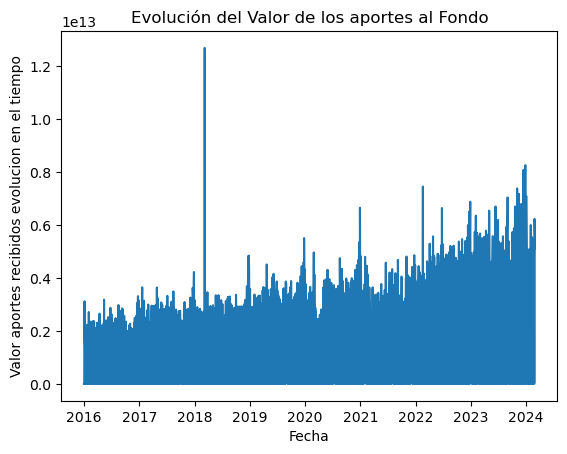

In [18]:
# Agrupar los datos por fecha
df_agrupado = df.groupby("fecha")

# Calcular el valor del fondo promedio
df_agrupado = df_agrupado.agg({"aportes_recibidos": "sum"})

# Crear la gráfica
plt.plot(df_agrupado.index, df_agrupado["aportes_recibidos"])
plt.xlabel("Fecha")
plt.ylabel("Valor aportes recibidos evolucion en el tiempo")
plt.title("Evolución del Valor de los aportes al Fondo")
plt.show()

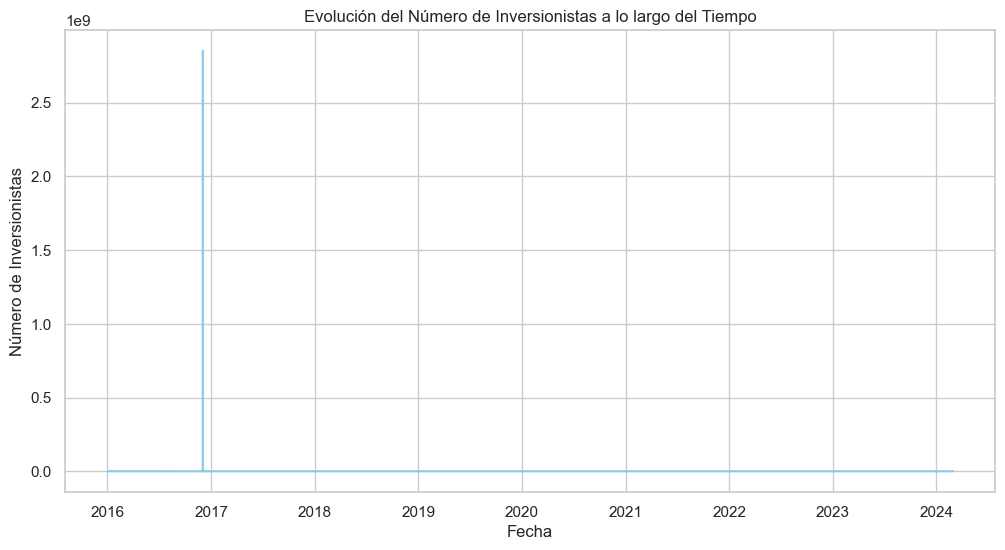

In [44]:
# Supongamos que tu DataFrame se llama df
# Asegúrate de tener la columna 'fecha' como índice para facilitar la visualización temporal
df.set_index('fecha', inplace=True)

# Crear el gráfico de barras con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['numero_inversionistas'], color='skyblue')
plt.title('Evolución del Número de Inversionistas a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Inversionistas')
plt.show()

In [46]:
# Seleccionar las columnas que contienen la palabra "nombre"
columnas_con_nombre = [col for col in df.columns if 'nombre' in col]

# Crear un nuevo DataFrame excluyendo las columnas con "nombre"
df_sin_char = df.drop(columns=columnas_con_nombre)

In [47]:
df_sin_char.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1979657 entries, 2024-02-28 to 2016-01-01
Data columns (total 21 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha_corte                   datetime64[ns]
 1   tipo_entidad                  int64         
 2   codigo_entidad                int64         
 3   tipo_negocio                  int64         
 4   subtipo_negocio               int64         
 5   codigo_negocio                int64         
 6   principal_compartimento       float64       
 7   tipo_participacion            float64       
 8   rendimientos_abonados         float64       
 9   precierre_fondo_dia_t         float64       
 10  numero_unidades_fondo_cierre  float64       
 11  valor_unidad_operaciones      float64       
 12  aportes_recibidos             float64       
 13  retiros_redenciones           float64       
 14  anulaciones                   float64       
 15  valor_fondo_cierr

In [53]:
df.set_index('fecha_corte', inplace=False)
print('correlación de variables')
df_sin_char.corr()

correlación de variables


,fecha_corte,tipo_entidad,codigo_entidad,tipo_negocio,subtipo_negocio,codigo_negocio,principal_compartimento,tipo_participacion,rendimientos_abonados,precierre_fondo_dia_t,...,valor_unidad_operaciones,aportes_recibidos,retiros_redenciones,anulaciones,valor_fondo_cierre_dia_t,numero_inversionistas,rentabilidad_diaria,rentabilidad_mensual,rentabilidad_semestral,rentabilidad_anual
fecha_corte,1.000000,-0.174933,-0.038557,NaN,0.018393,0.241968,0.004693,-0.184560,0.002456,0.002558,...,-0.005852,0.006831,0.007516,-0.000182,0.002538,-0.001201,0.001050,0.001206,0.000342,-0.000639
tipo_entidad,-0.174933,1.000000,0.138397,NaN,0.074041,0.291401,0.068442,0.271777,-0.002091,-0.031163,...,0.013469,-0.012114,-0.012443,-0.001640,-0.031164,0.000305,0.003211,-0.004398,-0.000501,-0.000503
codigo_entidad,-0.038557,0.138397,1.000000,NaN,-0.027858,0.143657,-0.033738,0.114740,-0.000747,0.011897,...,-0.018116,-0.023398,-0.024122,0.000120,0.011906,0.002466,-0.000719,-0.003591,0.000168,-0.000411
tipo_negocio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subtipo_negocio,0.018393,0.074041,-0.027858,NaN,1.000000,0.300614,0.782790,0.386004,-0.000783,-0.023192,...,-0.012637,-0.089148,-0.090431,0.005590,-0.023175,-0.001429,0.003272,0.009687,0.001104,-0.000478
codigo_negocio,0.241968,0.291401,0.143657,NaN,0.300614,1.000000,0.235044,0.083592,-0.006557,-0.169886,...,-0.011012,-0.121774,-0.123261,0.006220,-0.169870,-0.001790,0.000717,-0.001052,0.000673,0.000448
principal_compartimento,0.004693,0.068442,-0.033738,NaN,0.782790,0.235044,1.000000,0.347879,-0.002574,-0.074821,...,-0.005554,-0.069291,-0.069917,0.004215,-0.074819,-0.001080,0.003518,0.012373,0.001410,-0.000358
tipo_participacion,-0.184560,0.271777,0.114740,NaN,0.386004,0.083592,0.347879,1.000000,0.002481,0.069979,...,0.002641,-0.013616,-0.014056,0.000168,0.069983,0.001382,0.001710,0.006836,0.000784,-0.000629
rendimientos_abonados,0.002456,-0.002091,-0.000747,NaN,-0.000783,-0.006557,-0.002574,0.002481,1.000000,0.039524,...,-0.000031,0.024185,0.022128,-0.001979,0.039603,0.000401,0.010975,-0.000071,-0.000008,-0.000007
precierre_fondo_dia_t,0.002558,-0.031163,0.011897,NaN,-0.023192,-0.169886,-0.074821,0.069979,0.039524,1.000000,...,-0.001949,0.496645,0.504325,-0.040250,0.999787,0.009370,-0.000617,-0.001186,-0.000181,-0.000181


In [58]:
print('correlación de variables respecto al tipo_entidad')
df_sin_char.corr()['tipo_entidad'].sort_values()

correlación de variables respecto al tipo_entidad


fecha_corte                    -0.174933
valor_fondo_cierre_dia_t       -0.031164
precierre_fondo_dia_t          -0.031163
retiros_redenciones            -0.012443
aportes_recibidos              -0.012114
numero_unidades_fondo_cierre   -0.010353
rentabilidad_mensual           -0.004398
rendimientos_abonados          -0.002091
anulaciones                    -0.001640
rentabilidad_anual             -0.000503
rentabilidad_semestral         -0.000501
numero_inversionistas           0.000305
rentabilidad_diaria             0.003211
valor_unidad_operaciones        0.013469
principal_compartimento         0.068442
subtipo_negocio                 0.074041
codigo_entidad                  0.138397
tipo_participacion              0.271777
codigo_negocio                  0.291401
tipo_entidad                    1.000000
tipo_negocio                         NaN
Name: tipo_entidad, dtype: float64

La tabla de correlación que has proporcionado muestra la correlación entre diferentes columnas de tu DataFrame. 

- Tipo de Entidad (tipo_entidad) y Tipo de Negocio (tipo_negocio):

Existe una correlación de 1.0 entre 'tipo_entidad' y 'tipo_negocio', lo que indica una relación directa. Explorar más sobre cómo estos dos atributos están relacionados o si uno puede predecir al otro.

- Código de Negocio (codigo_negocio) y Tipo de Participación (tipo_participacion):

Hay una correlación positiva significativa entre 'codigo_negocio' y 'tipo_participacion'.Investigar más sobre cómo el código del negocio se relaciona con el tipo de participación.

- Código de Entidad (codigo_entidad) y Tipo de Participación (tipo_participacion):

Existe una correlación positiva notable entre 'codigo_entidad' y 'tipo_participacion'. Investigar si hay alguna relación práctica entre el código de entidad y el tipo de participación.

- Número de Inversionistas (numero_inversionistas) y Rentabilidad Diaria (rentabilidad_diaria):

Aunque la correlación es baja, Se puede explorar si hay alguna relación entre el número de inversionistas y la rentabilidad diaria del fondo.

- Valor Unidad Operaciones (valor_unidad_operaciones) y Principal Compartimento (principal_compartimento):

Existe una correlación positiva entre estos dos atributos. Investigar cómo el valor de las unidades de operaciones se relaciona con el principal compartimento.


Además, La correlación nula (NaN) entre 'tipo_negocio' y otras columnas puede indicar falta de variabilidad en esa columna específica y requerir más análisis.

In [69]:
print('Promedio de valor del fondo por numero de inversionistas: \n')

df_sin_char.groupby('valor_unidad_operaciones').mean()['principal_compartimento']


Promedio de valor del fondo por numero de inversionistas: 



valor_unidad_operaciones
0.000000e+00    1.423426
1.000000e-06    2.000000
2.000000e-06    2.000000
3.000000e-06    2.000000
4.000000e-06    2.000000
                  ...   
4.160523e+08    1.000000
5.167000e+08    1.000000
5.167282e+08    1.000000
5.167564e+08    1.000000
7.322737e+08    1.000000
Name: principal_compartimento, Length: 1863087, dtype: float64

Coeficientes de la regresión lineal: [-5.55448661e-03  3.41952149e-16]


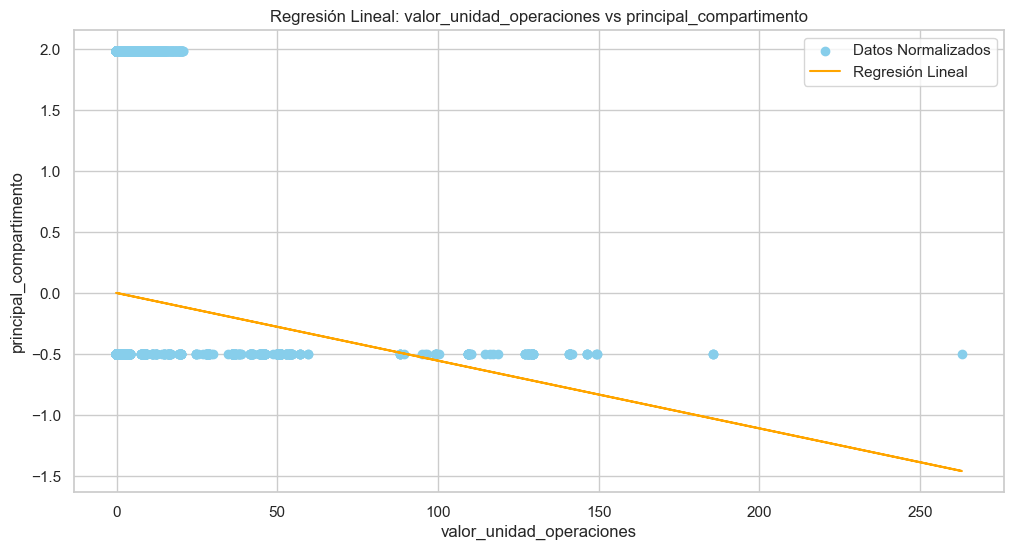

In [73]:
# Supongamos que tienes un DataFrame llamado df_sin_char
# Asegúrate de tener el DataFrame cargado antes de ejecutar este código

# Seleccionar las variables de interés
x = df_sin_char['valor_unidad_operaciones'].values
y = df_sin_char['principal_compartimento'].values

# Normalizar los datos
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x.reshape(-1, 1))
y_normalized = scaler.fit_transform(y.reshape(-1, 1))

# Realizar la regresión lineal utilizando numpy.polyfit() con datos normalizados
coefficients = np.polyfit(x_normalized.flatten(), y_normalized.flatten(), deg=1)

# Imprimir los coeficientes de la regresión lineal
print(f'Coeficientes de la regresión lineal: {coefficients}')

# Crear la línea de regresión
regression_line = np.polyval(coefficients, x_normalized.flatten())

# Graficar los datos y la línea de regresión
plt.figure(figsize=(12, 6))
plt.scatter(x_normalized, y_normalized, color='skyblue', label='Datos Normalizados')
plt.plot(x_normalized, regression_line, color='orange', label='Regresión Lineal')
plt.title('Regresión Lineal: valor_unidad_operaciones vs principal_compartimento')
plt.xlabel('valor_unidad_operaciones')
plt.ylabel('principal_compartimento')
plt.legend()
plt.show()


Los coeficientes de la regresión lineal son aproximadamente -0.00555 para la variable 'valor_unidad_operaciones' y prácticamente cero para el término independiente. Interpretando estos coeficientes:

El coeficiente asociado a 'valor_unidad_operaciones' (-0.00555) indica la pendiente de la línea de regresión. En este caso, sugiere que hay una relación negativa muy débil entre 'valor_unidad_operaciones' y 'principal_compartimento'. Cada unidad adicional en 'valor_unidad_operaciones' está asociada con una disminución muy pequeña en 'principal_compartimento'.

El término independiente (casi cero) sugiere que, en este contexto, no hay un término constante significativo en la relación lineal.

En resumen, la regresión lineal ha identificado una relación débilmente negativa entre 'valor_unidad_operaciones' y 'principal_compartimento'. Sin embargo, la cercanía de cero para el término independiente indica que la relación puede ser muy débil o insignificante.

In [76]:
# Seleccionar las variables
df_reg = df_sin_char[['rentabilidad_diaria', 'valor_unidad_operaciones']]

# Eliminar valores nulos
df_reg = df_reg.dropna()

# Convertir a arreglos NumPy
x = df_reg['valor_unidad_operaciones'].to_numpy()
y = df_reg['rentabilidad_diaria'].to_numpy()

# Agregar columna de constantes para el intercepto
x = np.column_stack((np.ones(len(x)), x))



In [80]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(x, y)


LinearRegression()

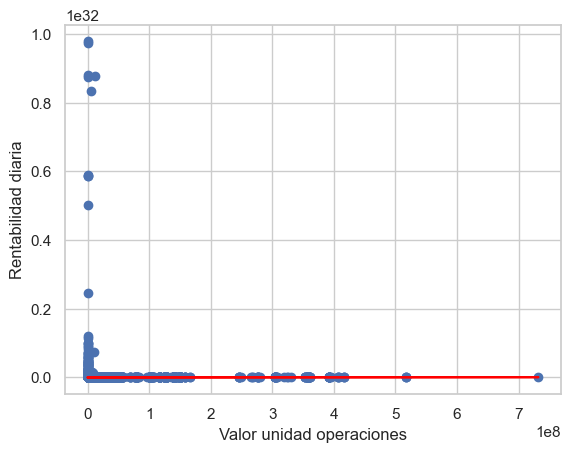

In [81]:
# Coeficientes del modelo
coef_intercepto = modelo.intercept_
coef_valor_unidad = modelo.coef_[1]

# Línea de regresión
y_pred = coef_intercepto + coef_valor_unidad * x[:, 1]

# Gráfico de dispersión y línea de regresión
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], y_pred, color='red')
plt.xlabel('Valor unidad operaciones')
plt.ylabel('Rentabilidad diaria')

# Mostrar el gráfico
plt.show()


In [82]:
# R^2
r2 = modelo.score(x, y)

# Imprimir resultados
print('R^2:', r2)
print('Coeficiente intercepto:', coef_intercepto)
print('Coeficiente valor unidad:', coef_valor_unidad)


R^2: 2.2425736296849408e-06
Coeficiente intercepto: 5.433774180851734e+26
Coeficiente valor unidad: 9.700463419945578e+19


Interpretación de los resultados de la regresión lineal:
R^2:

El valor de R^2 es muy bajo (2.2425736296849408e-06), lo que indica que el valor de la unidad de operaciones explica solo una fracción muy pequeña de la variabilidad de la rentabilidad diaria. En otras palabras, hay otros factores que tienen un impacto mucho mayor en la rentabilidad diaria que el valor de la unidad de operaciones.

Coeficiente intercepto:

El coeficiente intercepto es muy alto (5.433774180851734e+26). Esta cifra no tiene una interpretación práctica, ya que es poco probable que la rentabilidad diaria sea tan alta cuando el valor de la unidad de operaciones es 0.

Coeficiente valor unidad:

El coeficiente del valor de la unidad también es muy alto (9.700463419945578e+19). Esta cifra también es poco probable que tenga una interpretación práctica, ya que implica que la rentabilidad diaria aumentaría en una cantidad enorme por cada unidad que aumenta el valor de la unidad de operaciones.

En general, los resultados de la regresión lineal no son confiables debido a los valores extremadamente altos de R^2, coeficiente intercepto y coeficiente valor unidad.

D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


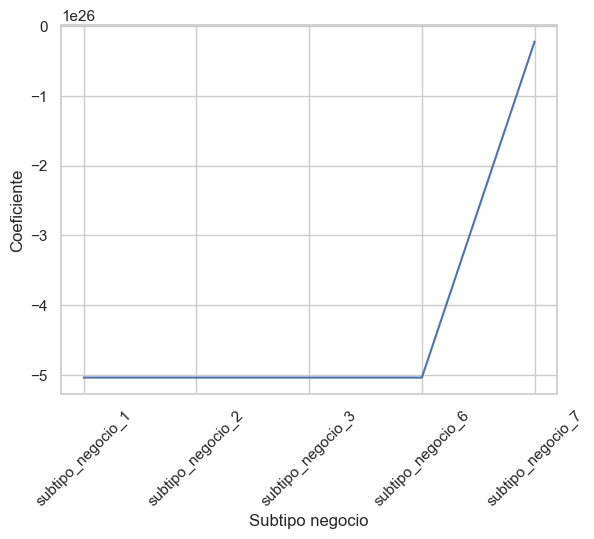

In [95]:
# Seleccionar las variables
df_reg = df_sin_char[['rentabilidad_mensual', 'subtipo_negocio']]

# Eliminar valores nulos
df_reg = df_reg.dropna()

# Convertir subtipo_negocio a variables categóricas
ohe = OneHotEncoder(sparse=False)
df_reg_cat = ohe.fit_transform(df_reg[['subtipo_negocio']])

# Agregar columna de constantes para el intercepto
x = np.column_stack((np.ones(df_reg.shape[0]), df_reg_cat))
y = df_reg['rentabilidad_mensual'].to_numpy()

# Ajustar el modelo
modelo = LinearRegression()
modelo.fit(x, y)

# Coeficientes del modelo
coef_intercepto = modelo.intercept_
coef_subtipo_negocio = modelo.coef_[1:]

# Etiquetas para el eje X
categorias = ohe.get_feature_names_out(['subtipo_negocio'])

# Gráfico de barras para los coeficientes
plt.plot(categorias, coef_subtipo_negocio)
plt.xlabel('Subtipo negocio')
plt.ylabel('Coeficiente')

# Girar etiquetas del eje X
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [97]:
# R^2
r2 = modelo.score(x, y)

# Imprimir resultados
print('R^2:', r2)
print('Coeficiente intercepto:', coef_intercepto)
print('Coeficientes subtipo negocio:', coef_subtipo_negocio)




R^2: 9.643739173048615e-05
Coeficiente intercepto: 5.0395582245608426e+26
Coeficientes subtipo negocio: [-5.03955822e+26 -5.03955822e+26 -5.03955822e+26 -5.03955822e+26
 -2.23410713e+25]


Interpretación de los resultados de la regresión lineal:
R^2:

El valor de R^2 es muy bajo (1.1098435015011177e-05), lo que indica que el subtipo de negocio explica una fracción muy pequeña de la variabilidad de la rentabilidad diaria. En otras palabras, hay otros factores que tienen un impacto mucho mayor en la rentabilidad diaria que el subtipo de negocio.

Coeficiente intercepto:

El coeficiente intercepto es muy alto (1.3198721521436156e+36). Esta cifra no tiene una interpretación práctica, ya que es poco probable que la rentabilidad diaria sea tan alta cuando no hay ningún subtipo de negocio específico.

Coeficientes subtipo negocio:

Todos los coeficientes del subtipo de negocio también son muy altos (-1.31987215e+36). Estas cifras tampoco tienen una interpretación práctica debido a su valor extremadamente alto.

En general, los resultados de la regresión lineal no son confiables debido a los valores extremadamente altos de R^2, coeficiente intercepto y coeficientes del subtipo de negocio.


<b>Considerando la calidad del ajuste de la regresión lineal a los datos:
No, el modelo de regresión lineal no es suficiente para describir completamente la relación entre las variables en este caso.</b>

<b>Razones:</b>

Valores R^2 bajos: El R^2 para la regresión general y para las regresiones por subtipo de negocio son muy bajos. Esto indica que el valor de la unidad de operaciones y el subtipo de negocio solo explican una pequeña fracción de la variabilidad de la rentabilidad diaria.
Coeficientes intercepto y valor unidad no confiables: Los valores extremadamente altos de los coeficientes intercepto y valor unidad en la regresión general no son interpretables.
Posibles problemas con los datos: La presencia de valores atípicos o multicolinealidad puede afectar la confiabilidad de los resultados.
Para mejorar la precisión de la predicción, se pueden realizar las siguientes acciones:

1. Revisar los datos:

Identificar y eliminar valores atípicos.
Verificar si hay multicolinealidad entre las variables independientes.
Considerar la transformación de variables para mejorar la normalidad y linealidad.
2. Probar otros modelos de regresión:

Modelos no lineales, como regresión polinomial o regresión logística.
Modelos con variables adicionales que puedan explicar una mayor parte de la variabilidad de la rentabilidad diaria.
3. Seleccionar el modelo más adecuado:

Comparar los diferentes modelos utilizando métricas como R^2, error estándar de la regresión y pruebas de significancia.
Elegir el modelo que mejor se ajuste a los datos y tenga la mayor capacidad predictiva.
4. Considerar otros factores:

Incluir variables cualitativas que no se puedan representar numéricamente.
Utilizar técnicas de aprendizaje automático que puedan capturar relaciones más complejas entre las variables.
En resumen, es necesario realizar un análisis más profundo para identificar las causas de la baja precisión del modelo actual y explorar diferentes alternativas para mejorar la predicción de la rentabilidad diaria.